In [4]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load datasets
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')

In [6]:
# Merge datasets
data = pd.merge(ratings, movies, on='movieId')

In [7]:
# Clean data
data['timestamp'] = pd.to_datetime(data['timestamp'], unit='s')

In [8]:
# Top-rated movies
top_rated = data.groupby('title')['rating'].mean().sort_values(ascending=False).head(10)

In [9]:
# Average rating by genre
data['genres'] = data['genres'].str.split('|')
data_exploded = data.explode('genres')
avg_rating_genre = data_exploded.groupby('genres')['rating'].mean().sort_values(ascending=False)

In [10]:
# Rating trends over time
data['year'] = data['timestamp'].dt.year
rating_trends = data.groupby('year')['rating'].mean()

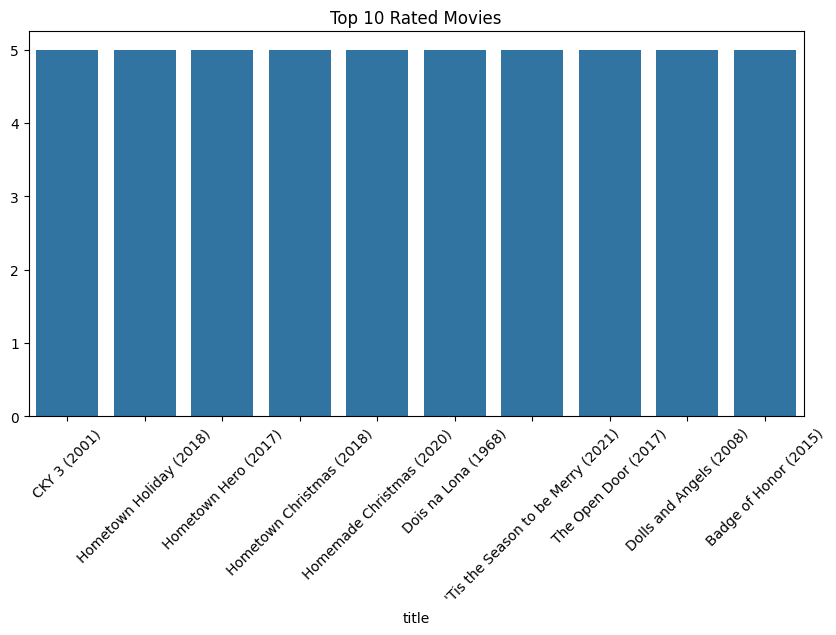

In [11]:
# Visualization
plt.figure(figsize=(10, 5))
sns.barplot(x=top_rated.index, y=top_rated.values)
plt.title('Top 10 Rated Movies')
plt.xticks(rotation=45)
plt.show()

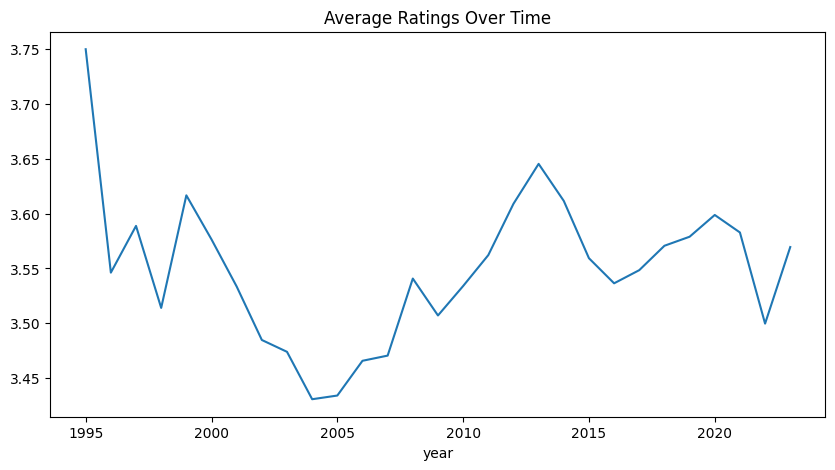

In [12]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=rating_trends.index, y=rating_trends.values)
plt.title('Average Ratings Over Time')
plt.show()